# Lab 10 - Linear Models

In [3]:
% matplotlib inline

## Directions

**Failure to follow the directions will result in a "0"**

The due dates for each are indicated in the Syllabus and the course calendar. If anything is unclear, please email EN605.448@gmail.com the official email for the course or ask questions in the Lab discussion area on Blackboard.

The Labs also present technical material that augments the lectures and "book".  You should read through the entire lab at the start of each module.

### General Instructions

1.  You will be submitting your assignment to Blackboard. If there are no accompanying files, you should submit *only* your notebook and it should be named using *only* your JHED id: fsmith79.ipynb for example if your JHED id were "fsmith79". If the assignment requires additional files, you should name the *folder/directory* your JHED id and put all items in that folder/directory, ZIP it up (only ZIP...no other compression), and submit it to Blackboard.
    
    * do **not** use absolute paths in your notebooks. All resources should appear in the same directory as the rest of your assignments.
    * the directory **must** be named your JHED id and **only** your JHED id.
    
2. Data Science is as much about what you write (communicating) as the code you execute (researching). In many places, you will be required to execute code and discuss both the purpose and the result. Additionally, Data Science is about reproducibility and transparency. This includes good communication with your team and possibly with yourself. Therefore, you must show **all** work.

3. Avail yourself of the Markdown/Codecell nature of the notebook. If you don't know about Markdown, look it up. Your notebooks should not look like ransom notes. Don't make everything bold. Clearly indicate what question you are answering.

4. Submit a cleanly executed notebook. It should say `In [1]` for the first codecell and increase by 1 throughout.

## Linear Regression

In a previous module (Lab 5), you performed EDA on the insurance data set. In this Lab, you should build a linear regression model trying to estimate `charges`.

In [2]:
import numpy as np
import random as py_random
import numpy.random as np_random
import time
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats

sns.set(style="whitegrid")

# Answer

In [5]:
insurance = pd.read_csv('insurance.csv')

In [6]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Some single variate analysis from Lab 5

In [7]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


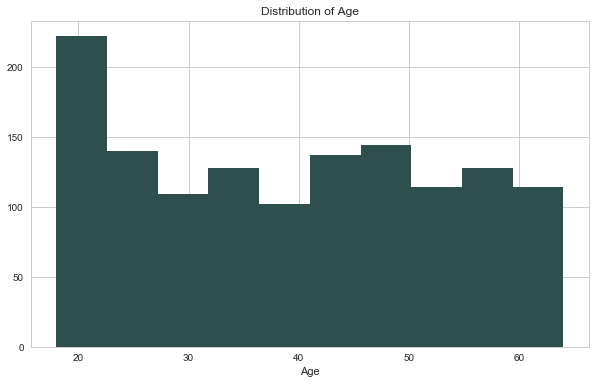

In [8]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.hist(insurance.age, color="darkslategray")
axes.set_title("Distribution of Age")
axes.set_xlabel("Age")

plt.show()
plt.close()

In [9]:
insurance.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

In [10]:
insurance.bmi.describe()

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

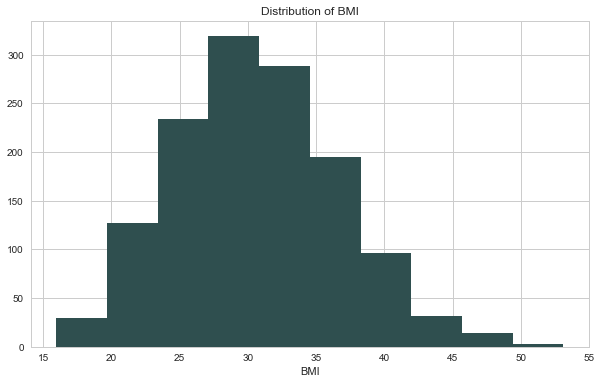

In [11]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.hist(insurance.bmi, color="darkslategray")
axes.set_title("Distribution of BMI")
axes.set_xlabel("BMI")

plt.show()
plt.close()

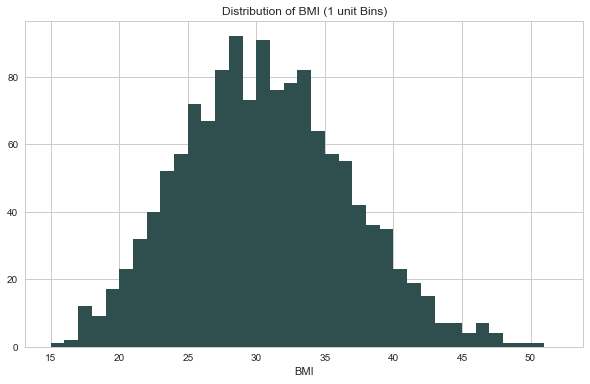

In [12]:
mn = int(insurance.bmi.min())
mx = int(insurance.bmi.max())
bins = [i for i in range(mn, mx, 1)]

figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.hist(insurance.bmi,bins=bins, color="darkslategray")
axes.set_title("Distribution of BMI (1 unit Bins)")
axes.set_xlabel("BMI")

plt.show()
plt.close()

In [13]:
insurance.children.describe()

count    1338.000000
mean        1.094918
std         1.205493
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         5.000000
Name: children, dtype: float64

In [14]:
insurance.smoker.value_counts(normalize=True)

no     0.795217
yes    0.204783
Name: smoker, dtype: float64

In [15]:
insurance.region.value_counts(normalize=True)

southeast    0.272048
southwest    0.242900
northwest    0.242900
northeast    0.242152
Name: region, dtype: float64

In [16]:
insurance.charges.describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

## Some plots against Charges from Lab 5

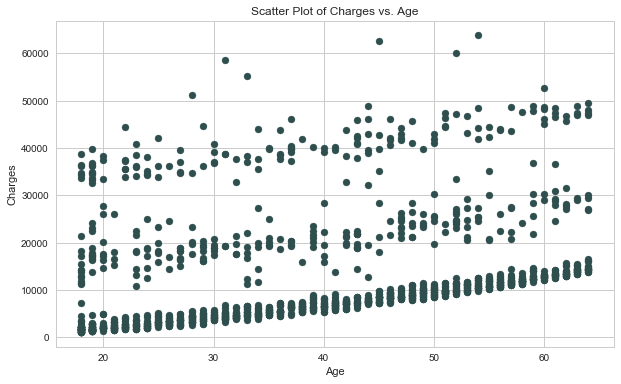

In [17]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.scatter( insurance.age, insurance.charges, marker="o", color="darkslategray")

axes.set_ylabel("Charges")
axes.set_xlabel("Age")
axes.set_title("Scatter Plot of Charges vs. Age")

plt.show()
plt.close()

In [18]:
def describe_by_category(data, numeric, categorical, transpose=False):
    grouped = data.groupby(categorical)
    grouped_y = grouped[numeric].describe()
    if transpose:
        print(grouped_y.transpose())
    else:
        print(grouped_y)
describe_by_category(insurance, "charges", "sex", transpose=True)

sex          female          male
count    662.000000    676.000000
mean   12569.578844  13956.751178
std    11128.703801  12971.025915
min     1607.510100   1121.873900
25%     4885.158700   4619.134000
50%     9412.962500   9369.615750
75%    14454.691825  18989.590250
max    63770.428010  62592.873090


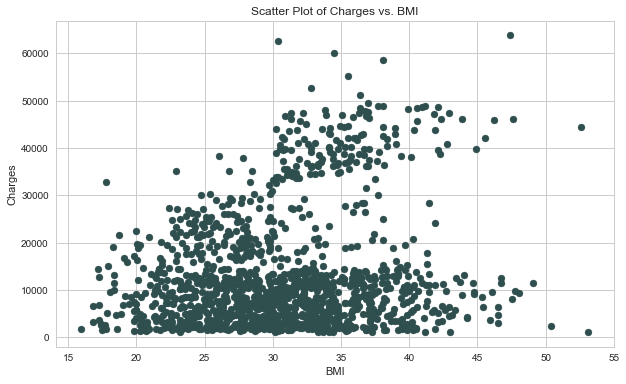

In [19]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.scatter( insurance.bmi, insurance.charges, marker="o", color="darkslategray")

axes.set_ylabel("Charges")
axes.set_xlabel("BMI")
axes.set_title("Scatter Plot of Charges vs. BMI")

plt.show()
plt.close()

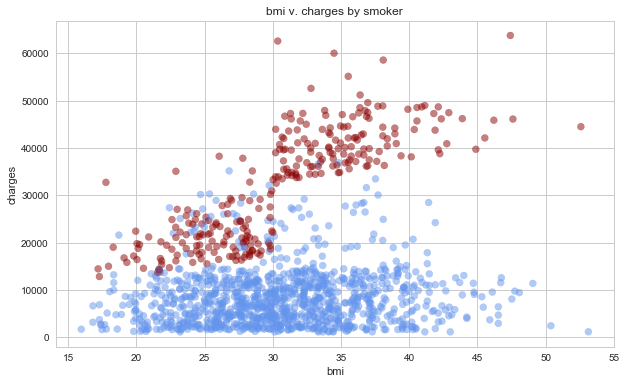

In [21]:
figure = plt.figure(figsize=(10, 6))
axes = figure.add_subplot(1, 1, 1)
colors = insurance["smoker"].apply(lambda x: "DarkRed" if x == "yes" else "CornflowerBlue")
axes.scatter( insurance["bmi"], insurance["charges"],alpha=.5, marker="o", color=colors)
axes.set_title("bmi v. charges by smoker")
axes.set_xlabel( "bmi")
axes.set_ylabel( "charges")
plt.show()
plt.close()

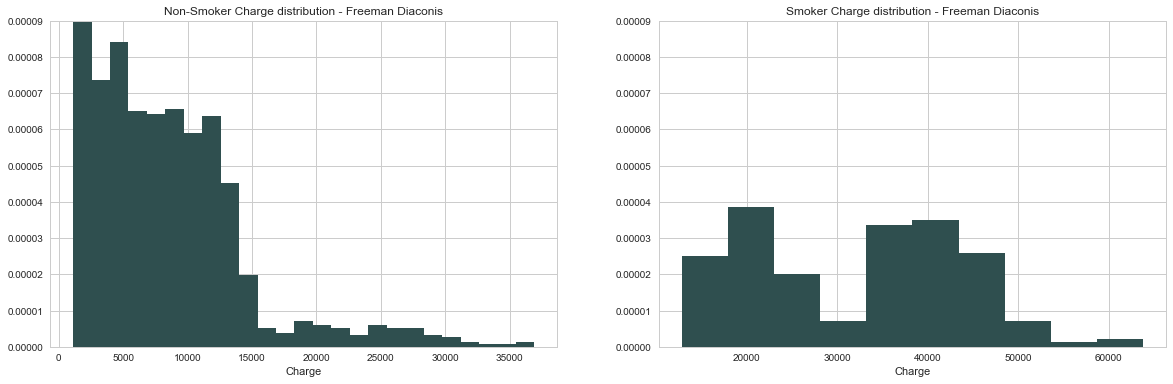

In [23]:
grouped = insurance.groupby("smoker")

figure = plt.figure(figsize=(20, 6))

axes = figure.add_subplot(1, 2, 1)
axes.hist(grouped["charges"].get_group("no"),bins='auto',color="darkslategray",density=True)
axes.set_title("Non-Smoker Charge distribution - Freeman Diaconis")
axes.set_xlabel("Charge")
axes.set_ylim((0,0.00009))

axes = figure.add_subplot(1, 2, 2)
axes.hist(grouped["charges"].get_group("yes"),bins='auto',color="darkslategray",density=True)
axes.set_title("Smoker Charge distribution - Freeman Diaconis")
axes.set_xlabel("Charge")
axes.set_ylim((0,0.00009))

plt.show()
plt.close()

In [25]:
## lifestyle
insurance["obese"] = insurance.bmi > 30
smoker = insurance.smoker == 'yes'
obese = insurance.obese == 1
high = smoker & obese
middle = smoker | obese

insurance["lifestyle"] = np.where(high, "high", np.where(middle , "middle", "low"))


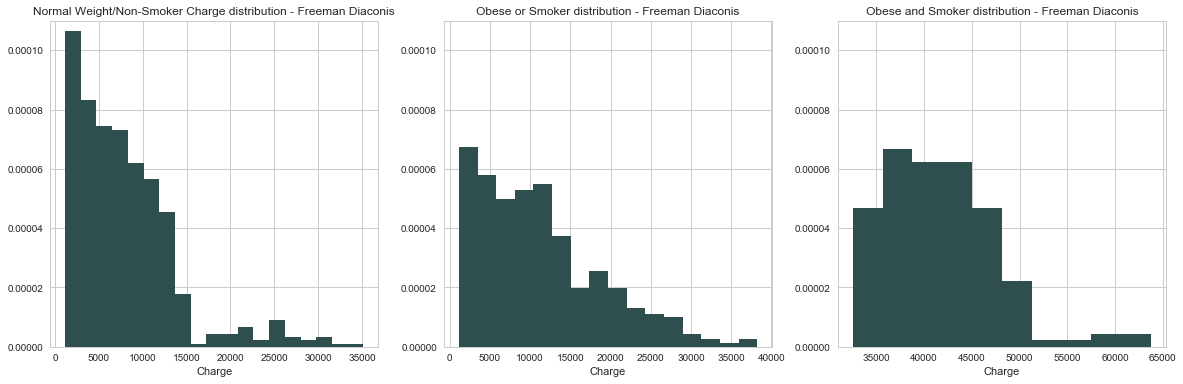

In [27]:
grouped = insurance.groupby("lifestyle")

figure = plt.figure(figsize=(20, 6))

axes = figure.add_subplot(1, 3, 1)
axes.hist(grouped["charges"].get_group("low"),bins='auto',color="darkslategray",density=True)
axes.set_title("Normal Weight/Non-Smoker Charge distribution - Freeman Diaconis")
axes.set_xlabel("Charge")
axes.set_ylim((0,0.00011))

axes = figure.add_subplot(1, 3, 2)
axes.hist(grouped["charges"].get_group("middle"),bins='auto',color="darkslategray",density=True)
axes.set_title("Obese or Smoker distribution - Freeman Diaconis")
axes.set_xlabel("Charge")
axes.set_ylim((0,0.00011))

axes = figure.add_subplot(1, 3, 3)
axes.hist(grouped["charges"].get_group("high"),bins='auto',color="darkslategray",density=True)
axes.set_title("Obese and Smoker distribution - Freeman Diaconis")
axes.set_xlabel("Charge")
axes.set_ylim((0,0.00011))

plt.show()
plt.close()

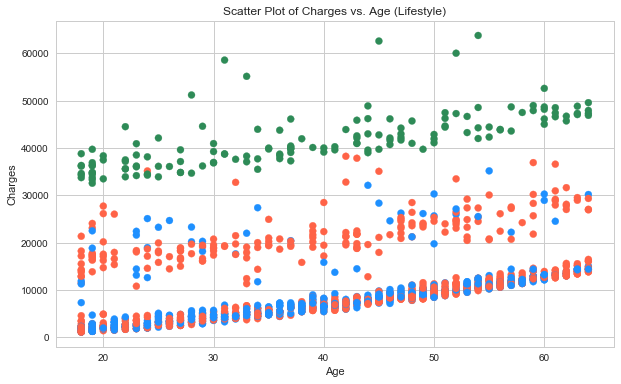

In [28]:
colors = insurance["lifestyle"].apply(lambda x: "DodgerBlue" if x == "low" else ("Tomato" if x == 'middle' else 'Seagreen'))

figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.scatter( insurance.age, insurance.charges, marker="o", color=colors)

axes.set_ylabel("Charges")
axes.set_xlabel("Age")
axes.set_title("Scatter Plot of Charges vs. Age (Lifestyle)")

plt.show()
plt.close()

## Predictions for Model
Based on the Explaratory data analysis, I would expect that
1. Age will have a slight positive impact on the total number of charges. Perhaps interactions variables will be important for this variable with smoker and BMI. 
2. Sex will have a positive increase on charges if you are a male.
3. BMI will have a slight increase in charges, however, if an interaction between this and smoking were performed, then I think the results would be more drastic.
4. I feel that the number of children might be a positive impact on charges, if children are brought onto the same plan. 
5. Smoker will be a positive increase in charges. However, there is an interaction with BMI and age to consider.
6. I feel that region might be slightly important, as the South might have higher charges, but its affects might get picked up on by the other variables.

In [29]:
import models

In [33]:
insurance_dum = pd.get_dummies(insurance,columns = ['sex','smoker','region'])
insurance_dum

,age,bmi,children,charges,obese,lifestyle,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,middle,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,True,middle,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,True,middle,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,False,low,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,False,low,0,1,1,0,0,1,0,0
5,31,25.740,0,3756.62160,False,low,1,0,1,0,0,0,1,0
6,46,33.440,1,8240.58960,True,middle,1,0,1,0,0,0,1,0
7,37,27.740,3,7281.50560,False,low,1,0,1,0,0,1,0,0
8,37,29.830,2,6406.41070,False,low,0,1,1,0,1,0,0,0
9,60,25.840,0,28923.13692,False,low,1,0,1,0,0,1,0,0


In [35]:
result = models.bootstrap_linear_regression("charges ~ age  + bmi+ children +sex_male + smoker_yes + region_northwest + region_southeast + region_southwest",insurance_dum)

In [37]:
display(models.describe_bootstrap_lr(result))

We can see that in our very simple multiple regression, we have a pretty decent R^2 of .75 and a sigma of 6062. Most of the variables seems significant and in line with what we have thought. Somehow, sex male was the opposite of what we expected and had seen, as we thought that females had lower charges on average. It also surprises me that the region northwest was the highest charging region, and also that all of the other regions had significantly different from 0 coefficients. 

In fact, the sex_males and the region_northwest overlap with 0, and based on what we learned in the lecture notes, these should be thrown out. 

In [38]:
result1 = models.bootstrap_linear_regression("charges ~ age  + bmi+ children + smoker_yes + region_southeast + region_southwest",insurance_dum)
display(models.describe_bootstrap_lr(result1))

The coefficients for region_southeast changed a bit, but are still in line with what we expect. Now let's add in some interaction terms. We are particularly interested in smoker times bmi, and age times smoker times bmi.

In [40]:
insurance_dum['smoker_bmi'] = insurance_dum['smoker_yes'] * insurance_dum['bmi']
insurance_dum['smoker_bmi_age'] = insurance_dum['smoker_yes'] * insurance_dum['bmi'] * insurance_dum['age']

In [41]:
result1 = models.bootstrap_linear_regression("charges ~ age  + bmi+ children + smoker_yes + region_southeast + region_southwest + smoker_bmi + smoker_bmi_age",insurance_dum)
display(models.describe_bootstrap_lr(result1))

It does not seem like our three way interaction term added that much value to the model, so we should throw it out. However, what's really interesting is that the smoker_bmi variable had such a large impact, and that the smoker_yes sign completely flipped. Also, the effect of BMI seems much decreased, but it seems like it still adds some value. 

In [42]:
result1 = models.bootstrap_linear_regression("charges ~ age  + bmi+ children + smoker_yes + region_southeast + region_southwest + smoker_bmi",insurance_dum)
display(models.describe_bootstrap_lr(result1))

This looks much improved over our original model. The R^2 has improved and the s.d has decreased. 

In [58]:
residuals = np.array([x for [x] in result1['residuals'].tolist()])

In [59]:
insurance['fitted_charges'] = insurance['charges'] + residuals

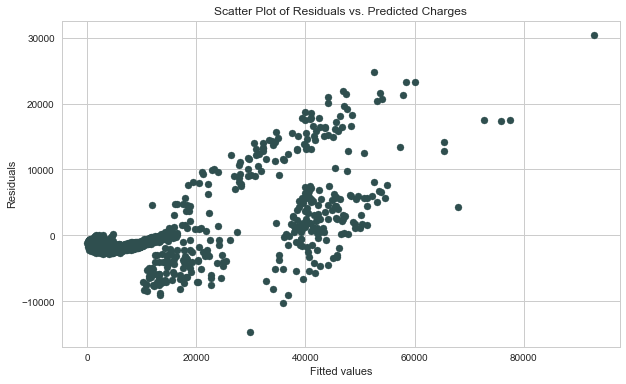

In [60]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.scatter(insurance['fitted_charges'], residuals, marker="o", color="darkslategray")

axes.set_ylabel("Residuals")
axes.set_xlabel("Fitted values")
axes.set_title("Scatter Plot of Residuals vs. Predicted Charges")

plt.show()
plt.close()

This model could be improved as there does seem to be a lot of patterns involved in the residuals vs. the fitted values. However, I'm not sure what sorts of transformations would be needed.